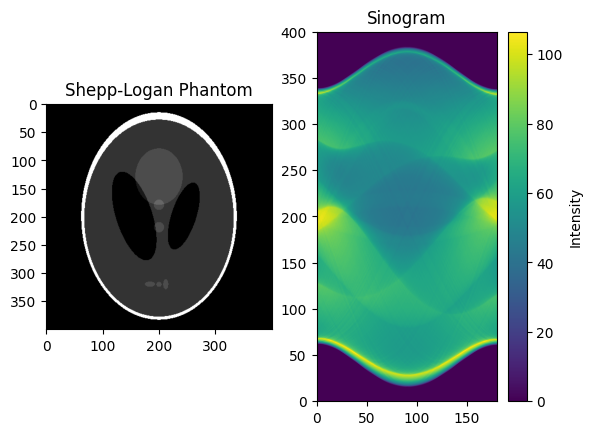

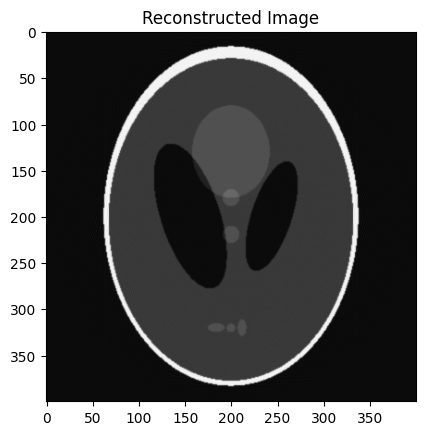

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from skimage.data import shepp_logan_phantom
from skimage.transform import radon, iradon

def generate_sinogram_with_theta(phantom, theta, cmap='viridis'):
    sinogram = radon(phantom, theta=theta, circle=True)

    plt.subplot(121)
    plt.imshow(phantom, cmap='gray')
    plt.title('Shepp-Logan Phantom')

    plt.subplot(122)
    plt.imshow(sinogram, cmap=cmap, aspect='auto', extent=[min(theta), max(theta), 0, sinogram.shape[0]])
    plt.colorbar(label='Intensity')
    plt.title('Sinogram' )

    plt.show()

    return sinogram

def reconstruct_image_from_sinogram(sinogram, theta):
    reconstructed_image = iradon(sinogram, theta=theta, circle=True)

    plt.imshow(reconstructed_image, cmap='gray')
    plt.title('Reconstructed Image')
    plt.show()

# Generate Shepp-Logan phantom
phantom = shepp_logan_phantom()

# Specify the sampling angle theta (in degrees) with a sampling rate of 0.05 degrees
theta_values = np.arange(0, 180, 0.05)

# Generate sinogram with specified theta values
sinogram = generate_sinogram_with_theta(phantom, theta_values)

# Reconstruct the image from the sinogram
reconstruct_image_from_sinogram(sinogram, theta_values)


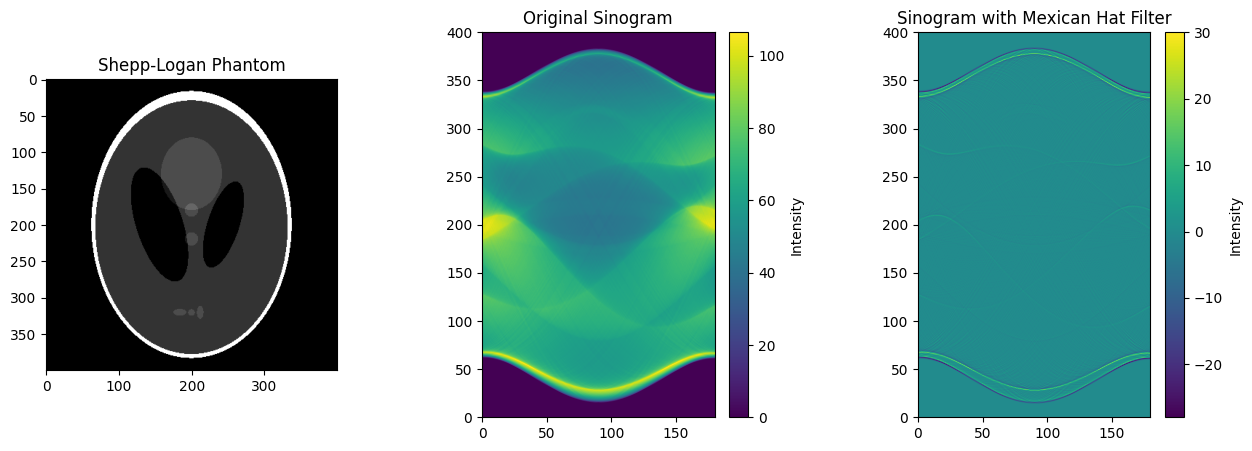

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import convolve1d
from skimage.data import shepp_logan_phantom
from skimage.transform import radon

def generate_sinogram_with_theta(phantom, theta, cmap='viridis'):
    sinogram = radon(phantom, theta=theta, circle=True)

    # Apply Mexican Hat filter
    mexican_hat_kernel = np.array([-1, 2, -1])
    filtered_sinogram = convolve1d(sinogram, mexican_hat_kernel, axis=0, mode='constant', cval=0)

    fig, axes = plt.subplots(1, 3, figsize=(15, 5))  # 1 row, 3 columns

    axes[0].imshow(phantom, cmap='gray')
    axes[0].set_title('Shepp-Logan Phantom')

    axes[1].imshow(sinogram, cmap=cmap, aspect='auto', extent=[min(theta), max(theta), 0, sinogram.shape[0]])
    axes[1].set_colorbar(label='Intensity')
    axes[1].set_title('Original Sinogram')

    axes[2].imshow(filtered_sinogram, cmap=cmap, aspect='auto', extent=[min(theta), max(theta), 0, filtered_sinogram.shape[0]])
    axes[2].set_colorbar(label='Intensity')
    axes[2].set_title('Sinogram with Mexican Hat Filter')

    plt.subplots_adjust(wspace=0.5)  # Adjust the width space between subplots

    plt.show()

# Generate Shepp-Logan phantom
phantom = shepp_logan_phantom()

# Specify the sampling angle theta (in degrees) with a sampling rate of 0.05 degrees
theta_values = np.arange(0, 180, 0.05)

# Generate sinogram with specified theta values and apply Mexican Hat filter
generate_sinogram_with_theta(phantom, theta_values)


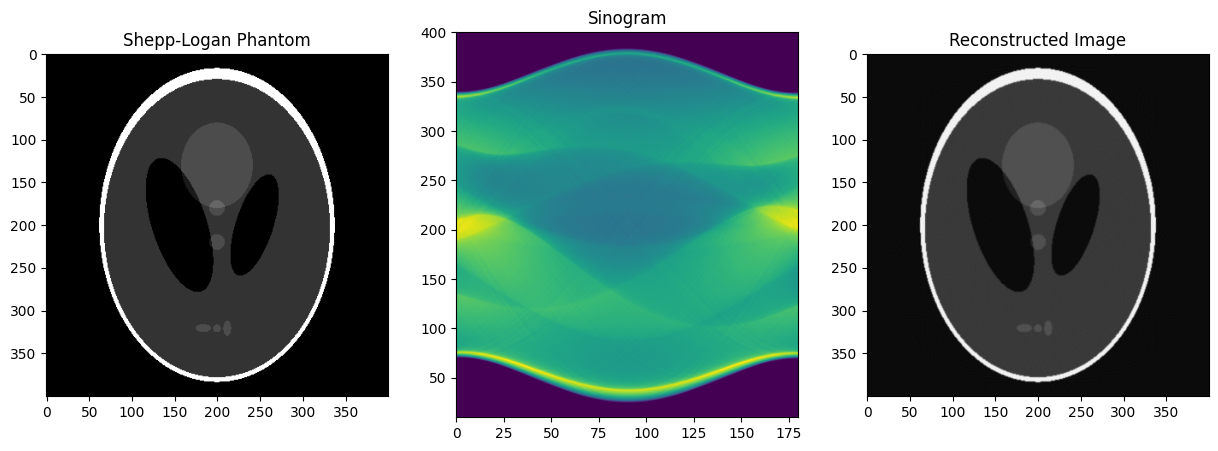

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from skimage.data import shepp_logan_phantom
from skimage.transform import radon, iradon

# Generate Shepp-Logan phantom
phantom = shepp_logan_phantom()

# Perform radon transform (projection)
theta = np.linspace(0., 180., max(phantom.shape), endpoint=False)
sinogram = radon(phantom, theta=theta, circle=True)

# Perform inverse radon transform (back projection)
reconstructed_image = iradon(sinogram, theta=theta, circle=True)

# Display results
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

axes[0].imshow(phantom, cmap='gray')
axes[0].set_title('Shepp-Logan Phantom')

axes[1].imshow(sinogram, cmap='viridis', aspect='auto', extent=[0, 180, 10, sinogram.shape[0]])
axes[1].set_title('Sinogram')

axes[2].imshow(reconstructed_image, cmap='gray')
axes[2].set_title('Reconstructed Image')

plt.show()


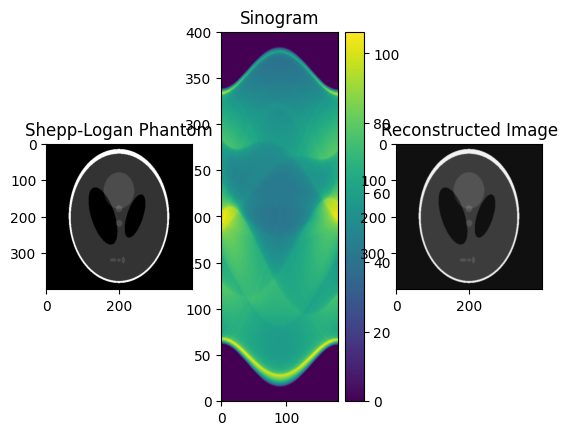

<Figure size 640x480 with 0 Axes>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from skimage.data import shepp_logan_phantom
from skimage.transform import radon, iradon

def generate_sinogram_with_theta(phantom, theta, cmap='viridis'):
    sinogram = radon(phantom, theta=theta, circle=True)

    plt.subplot(131)  # Adjusted to include three subplots in one row
    plt.imshow(phantom, cmap='gray')
    plt.title('Shepp-Logan Phantom')

    plt.subplot(132)  # Adjusted to include three subplots in one row
    plt.imshow(sinogram, cmap=cmap, aspect='auto', extent=[min(theta), max(theta), 0, sinogram.shape[0]])
    plt.colorbar(label='Intensity')
    plt.title('Sinogram' )

    return sinogram

def reconstruct_image_from_sinogram(sinogram, theta):
    reconstructed_image = iradon(sinogram, theta=theta, circle=True)

    plt.subplot(133)  # Adjusted to include three subplots in one row
    plt.imshow(reconstructed_image, cmap='gray')
    plt.title('Reconstructed Image')

    plt.show()

# Generate Shepp-Logan phantom
phantom = shepp_logan_phantom()

# Specify the sampling angle theta (in degrees) with a sampling rate of 0.05 degrees
theta_values = np.arange(0, 180, 0.5)

# Generate sinogram with specified theta values
sinogram = generate_sinogram_with_theta(phantom, theta_values)

# Reconstruct the image from the sinogram
reconstruct_image_from_sinogram(sinogram, theta_values)

plt.tight_layout()  # Adjust the layout to prevent overlapping
plt.show()


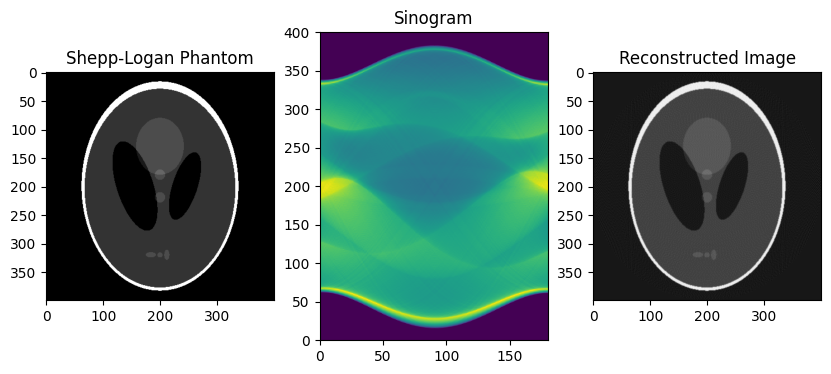

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from skimage.data import shepp_logan_phantom
from skimage.transform import radon, iradon

# Generate Shepp-Logan phantom
phantom = shepp_logan_phantom()

# Perform Radon transform to obtain sinogram
sinogram = radon(phantom)

# Apply Central Slice Theorem by taking the inverse Radon transform
reconstructed_image = iradon(sinogram)

# Display the results
plt.figure(figsize=(10, 4))

plt.subplot(131)
plt.imshow(phantom, cmap='gray')
plt.title('Shepp-Logan Phantom')

plt.subplot(132)
plt.imshow(sinogram, cmap='viridis', aspect='auto', extent=[0, 180, 0, sinogram.shape[0]])
plt.title('Sinogram')

plt.subplot(133)
plt.imshow(reconstructed_image, cmap='gray')
plt.title('Reconstructed Image')

plt.show()


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from skimage.data import shepp_logan_phantom
from skimage.transform import radon, iradon
from scipy.signal import convolve
from skimage.measure import compare_mse

def apply_filter(sinogram, filter_type):
    # Apply filter to sinogram
    if filter_type == 'ram-lak':
        filter_func = lambda x: np.abs(x)
    elif filter_type == 'shepp-logan':
        filter_func = lambda x: np.abs(x) * np.sin(np.pi * x / (2 * len(x)))
    elif filter_type == 'cosine':
        filter_func = lambda x: np.abs(x) * np.cos(np.pi * x / (2 * len(x)))
    elif filter_type == 'hamming':
        filter_func = lambda x: np.abs(x) * (0.54 + 0.46 * np.cos(2 * np.pi * x / len(x)))
    else:
        raise ValueError(f"Unsupported filter type: {filter_type}")

    filtered_sinogram = convolve(sinogram, filter_func(np.arange(len(sinogram))), mode='same', method='direct')

    return filtered_sinogram, filter_func(np.arange(len(sinogram)))

def reconstruct_image(filtered_sinogram, angles):
    # Perform filtered backprojection
    reconstructed_image = iradon(filtered_sinogram, theta=angles, circle=True)

    return reconstructed_image

# Generate Shepp-Logan phantom
phantom = shepp_logan_phantom()

# Specify the sampling angle theta (in degrees)
theta_values = np.arange(0, 180, 1)

# Generate sinogram with specified theta values
sinogram = radon(phantom, theta=theta_values, circle=True)

# Define filter types
filter_types = ['ram-lak', 'shepp-logan', 'cosine', 'hamming']

# Define the angles variable
angles = theta_values

# Perform filtered backprojection with different filters
for filter_type in filter_types:
    filtered_sinogram, _ = apply_filter(sinogram, filter_type)
    reconstructed_image = reconstruct_image(filtered_sinogram, angles)

    # Calculate Mean Square Error
    mse = compare_mse(phantom, reconstructed_image)

    # Display results
    plt.figure(figsize=(12, 4))
    plt.subplot(131)
    plt.imshow(phantom, cmap='gray')
    plt.title('Original Image')

    plt.subplot(132)
    plt.imshow(reconstructed_image, cmap='gray')
    plt.title(f'Reconstructed Image ({filter_type.capitalize()} Filter)\nMSE: {mse:.4f}')

    plt.subplot(133)
    plt.plot(angles, filtered_sinogram.mean(axis=0), label='Filtered Sinogram')
    plt.legend()
    plt.title('Filtered Sinogram')

    plt.show()


ImportError: cannot import name 'compare_mse' from 'skimage.measure' (/usr/local/lib/python3.10/dist-packages/skimage/measure/__init__.py)

In [ ]:
!pip install matplotlib-venn

In [ ]:
!apt-get -qq install -y libfluidsynth1

E: Package 'libfluidsynth1' has no installation candidate


SyntaxError: incomplete input (<ipython-input-2-1f75c67765ba>, line 17)